In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [22]:
df = pd.read_csv(r'C:\Users\user\data\fcc-forum-pageviews.csv')

In [23]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by = 'date', inplace = True)
df.set_index('date',inplace = True)
percentile95 = df['value'].quantile(0.95)
percentile5 = df['value'].quantile(0.05)
df = df.query('value > @percentile5 and value < @percentile95')
df

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923
...,...
2019-11-03,130118
2019-11-09,115642
2019-11-10,117717


<function matplotlib.pyplot.show(close=None, block=None)>

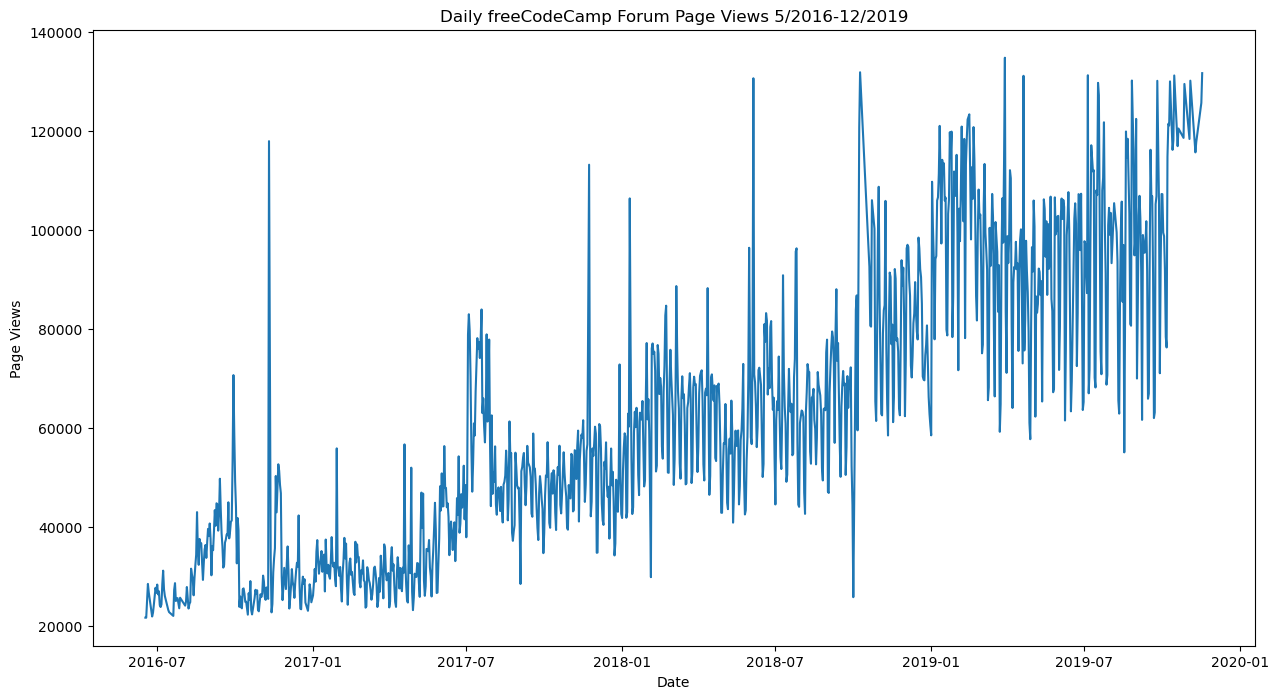

In [24]:
plt.figure(figsize=(15,8))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show

In [25]:
df['year'] = df.index.year
df['month'] = df.index.month
month_label = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month'] = df['month'].apply(lambda data: month_label[data-1])
df['month'] = pd.Categorical(df['month'], categories=month_label)

In [26]:
display(df)

,value,year,month
date,,,
2016-06-17,21691,2016,June
2016-06-18,21681,2016,June
2016-06-20,28508,2016,June
2016-06-21,26805,2016,June
2016-06-25,21923,2016,June
...,...,...,...
2019-11-03,130118,2019,November
2019-11-09,115642,2019,November
2019-11-10,117717,2019,November


In [27]:
df_pivot = pd.pivot_table(
    df, 
    values='value',
    index='year',
    columns='month', 
    aggfunc=np.mean
)

Text(0, 0.5, 'Average Page Views')

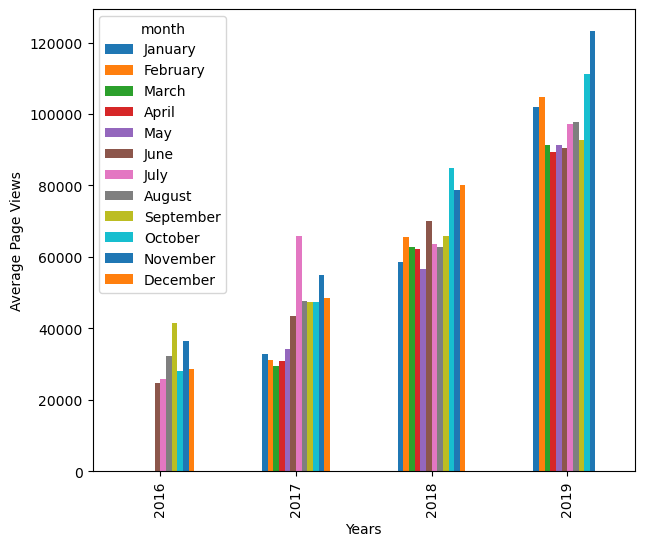

In [33]:
ax = df_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(7,6)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

In [39]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    sns.despine(top=True, right=True)
    plt.show()

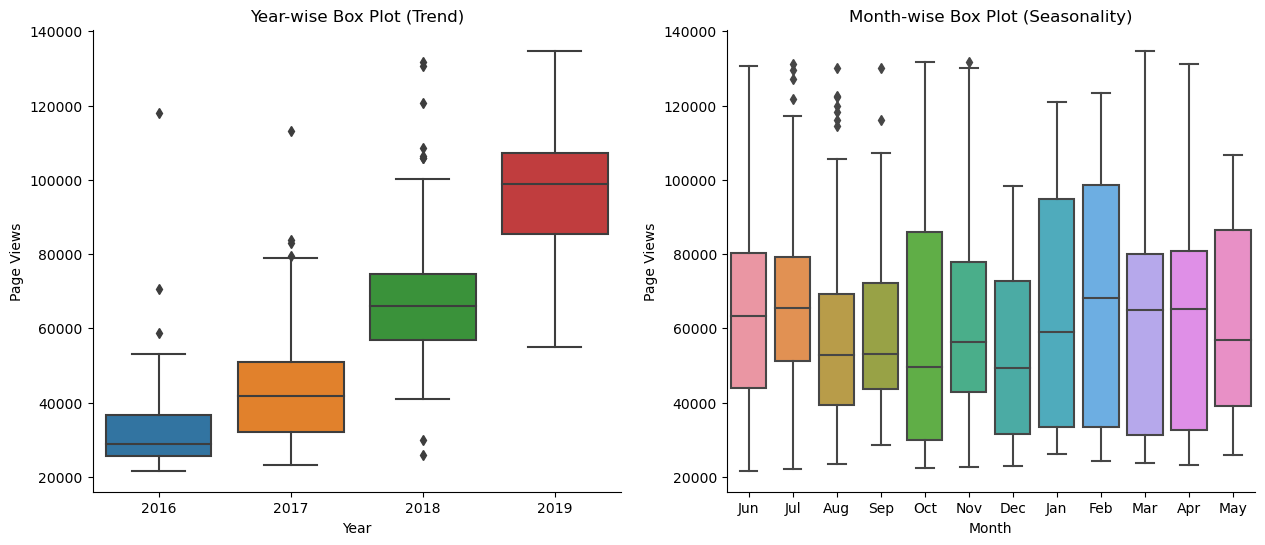

In [40]:
draw_box_plot()